# Cleaning Testing Data
**This df was cleaned in a separate notebook to avoid errors that may occur while overwriting variables stored in the kernel. The cleaned dataframe was exported to a csv file named "test_data_CLEAN.csv" and is imported into the Ames_Housing_Model notebook to be run through the models.**

**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [2]:
test_data = "./datasets/test.csv" #might have to add a second period in the relative file path, this file was moved into a folder before and now this is the path that works
test = pd.read_csv(test_data)
df = test #This can be changed to test to run the test data
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


**Correct Data Types**

Due to the size of the data frame. The datatypes are analyzed 15 at a time.

In [3]:
df.shape

(878, 80)

In [4]:
columns = df.columns

df[columns[45:75]].dtypes

2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath       int64
Bsmt Half Bath       int64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual        object
TotRms AbvGrd        int64
Functional          object
Fireplaces           int64
Fireplace Qu        object
Garage Type         object
Garage Yr Blt      float64
Garage Finish       object
Garage Cars          int64
Garage Area          int64
Garage Qual         object
Garage Cond         object
Paved Drive         object
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Pool QC             object
Fence               object
dtype: object

Data Types needed to be changed
- Year Built - convert to home age column 
- Year Remod/Add -convert to age
- Garage Yr Blt - convert to age

**Handle Null/Missing Values**

There are 18 columns with missing values. A few of these columns will be dropped, but the missing values for the ordinal data columns will be replaced with zeroes because the absence of a feature will be ranked as 0.

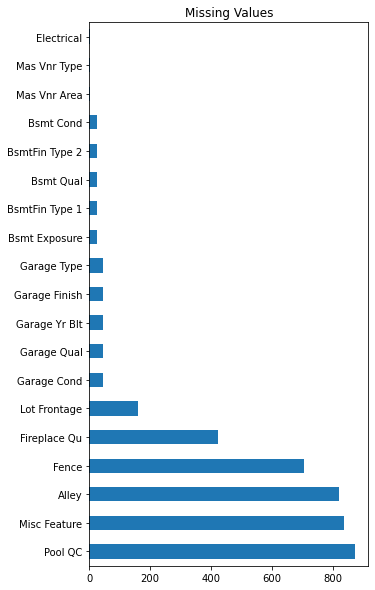

In [6]:
#All columns with missing values are plotted.
missing_values = df[columns].isnull().sum().sort_values()[:-20:-1]
plt.figure(figsize = (5,10))
plt.title("Missing Values")
missing_values.plot(kind = 'barh');

**Drop Columns**

Fireplace Qu column column will have its null values assigned the value of zero instead of dropped. This is done in the ordinal data section.

In [7]:
df = df.drop(columns = ['PID','Misc Feature', 'Alley', 'Yr Sold', 'Sale Type','Lot Frontage'])

df.shape

(878, 74)

**Assign Hierarchy Values to Ordinal Data**


**Ordinal Columns**
1. Utilities 
2. Land Slope 
3. Overall Qual 
4. Overall Cond 
5. Exter Qual
6. Exter Cond
7. Bsmt Cond
8. Bsmt Qual
9. Bsmt Exposure
10. BsmtFin Type 1
11. BsmtFin Type 2
12. Heating QC
13. Electrical
14. Kitchen Qual
15. FireplaceQu
16. Garage Finish
17. Garage Qual
18. Garage Cond
19. Paved Drive
20. Pool QC
21. Fence

*Ordinize* function converts ordinal text data to numeric hierarchy.

In [8]:

def ordinize(df):

    df['Utilities'] = df['Utilities'].map({'AllPub': 3,
                                            'NoSeWa' : 2,
                                           'NoSewr': 1})

    df['Land Slope'] = df['Land Slope'].map({'Gtl': 3,
                                            'Mod' : 2,
                                           'Sev': 1})

    df['Exter Qual'] = df['Exter Qual'].map({'Ex': 5,
                                            'Gd' : 4,
                                           'TA': 3,
                                              'Fa': 2,
                                              'Po': 1})
    
    
    df['Lot Shape'] = df['Lot Shape'].map({'Reg': 3,
                                            'IR1' : 2,
                                           'IR2': 1,
                                              'IR3': 0})


    df['Exter Cond'] = df['Exter Cond'].map({'Ex': 5,
                                            'Gd' : 4,
                                           'TA': 3,
                                              'Fa': 2,
                                              'Po': 1})

    df['Bsmt Cond'] = df['Bsmt Cond'].map({'Ex': 5,
                                            'Gd' : 4,
                                           'TA': 3,
                                              'Fa': 2,
                                              'Po': 1,
                                          np.nan : 0})
    
    df['Bsmt Qual'] = df['Bsmt Qual'].map({'Ex': 5,
                                            'Gd' : 4,
                                           'TA': 3,
                                              'Fa': 2,
                                              'Po': 1,
                                          np.nan : 0})

    df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'Gd': 5,
                                            'Av' : 4,
                                           'Mn': 3,
                                              'No': 2}) 


    df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'GLQ': 6,
                                            'ALQ' : 5,
                                            'BLQ': 4,
                                            'Rec': 3,
                                            'LwQ': 2,
                                            'Unf':1,}) 


    df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({'GLQ': 6,
                                            'ALQ' : 5,
                                            'BLQ': 4,
                                            'Rec': 3,
                                            'LwQ': 2,
                                            'Unf':1,}) 

    df['Heating QC'] = df['Heating QC'].map({'Ex': 5,
                                                'Gd' : 4,
                                               'TA': 3,
                                                  'Fa': 2,
                                                  'Po': 1})

    df['Electrical'] = df['Electrical'].map({'SBrkr': 5,
                                                'FuseA' : 4,
                                               'FuseF': 3,
                                                  'FuseP': 2,
                                                  'Mix': 1})

    df['Kitchen Qual'] = df['Kitchen Qual'].map({'Ex': 5,
                                                'Gd' : 4,
                                               'TA': 3,
                                                  'Fa': 2,
                                                  'Po': 1})

    df['Fireplace Qu'] = df['Fireplace Qu'].map({'Ex': 5, 
                                                'Gd' : 4,
                                               'TA': 3,
                                                  'Fa': 2,
                                                  'Po': 1})

    df['Garage Qual'] = df['Garage Qual'].map({'Ex': 5,  
                                                'Gd' : 4,
                                               'TA': 3,
                                                  'Fa': 2,
                                                  'Po': 1})

    df['Garage Cond'] = df['Garage Cond'].map({'Ex': 5,  
                                                'Gd' : 4,
                                               'TA': 3,
                                                  'Fa': 2,
                                                  'Po': 1})
    
    df['Garage Finish'] = df['Garage Finish'].map({'Fin': 5,  
                                                'RFn' : 3,
                                               'Unf': 1,
                                                  np.nan: 0})


    df['Paved Drive'] = df['Paved Drive'].map({'Y': 3,
                                                'P' : 2,
                                               'N': 1})


    df['Pool QC'] = df['Pool QC'].map({'Ex': 10,  
                                                'Gd' : 8,
                                               'TA': 5,
                                                  'Fa': 4})

    df['Fence'] = df['Fence'].map({'GdPrv': 10,  
                                                'MnPrv' : 8,
                                               'GdWo': 5,
                                                  'MnWw': 4})
    
    return "No Errors"
    




ordinize(df)

'No Errors'

This fills in the null values of the ordinal columns with 0. The null values in the ordinal columns indicate an absence of that feature.

In [10]:
ordinal_columns = ['Fence','Pool QC', 'Garage Cond', 'Garage Qual', 'Fireplace Qu', 'BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure']

df.loc[:, ordinal_columns ] = df.loc[:, ordinal_columns].fillna(0)

In [11]:
df.shape

(878, 74)

Replace the null values in Garage Type to the category 'No Garage'. This will be one hot encoded with the other nominal data columns later.

In [12]:
df['Garage Type'] = df['Garage Type'].replace(np.nan,'No Garage')

In [13]:
df['Garage Yr Blt']

0      1910.0
1      1977.0
2      2006.0
3      1935.0
4      1963.0
        ...  
873    1974.0
874    1966.0
875    1968.0
876    1974.0
877    1955.0
Name: Garage Yr Blt, Length: 878, dtype: float64

There were over 100 null values for the garage yr built existing because these are houses that do not have a garage. To avoid dropping large amounts of data, the null values are replaced with the year the house was built. This column was not simply dropped because it is ranked 10th best in correlation with Sale_Price. Replacing null values with the year the house was built was a fair compromise.

In [14]:
#gyb is garage year built, hyb is house year built
#because np.nan != np.nan, we will fill the nan values with something else first

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna('filler')
df['Garage Yr Blt'] = [hyb if gyb == 'filler' else gyb for gyb, hyb in zip(df['Garage Yr Blt'], df['Year Built'])]

df['Garage Yr Blt'].sort_values(ascending = False)

315    2010.0
316    2010.0
452    2010.0
40     2009.0
85     2009.0
        ...  
350    1902.0
270    1900.0
522    1900.0
232    1900.0
337    1890.0
Name: Garage Yr Blt, Length: 878, dtype: float64

In [15]:
#fix typo in data
df['Garage Yr Blt'] = df['Garage Yr Blt'].replace(2207.0 , 2007.0)

df['Garage Yr Blt'].sort_values()

337    1890.0
232    1900.0
522    1900.0
270    1900.0
350    1902.0
        ...  
85     2009.0
40     2009.0
452    2010.0
316    2010.0
315    2010.0
Name: Garage Yr Blt, Length: 878, dtype: float64

In [16]:
df.shape

(878, 74)

Convert years of home,remodel, and garage to age columns.

In [17]:
df['age_of_home'] = 2021 - df['Year Built']
df['age_of_garage'] = 2021 - df['Garage Yr Blt']
df['age_of_remodel'] = 2021 - df['Year Remod/Add']
df = df.drop(columns = ['Year Built','Garage Yr Blt','Year Remod/Add'])
df.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive'

In [19]:
#checking the progress of handling null values
columns = df.columns #red
df[columns].isnull().sum().sort_values(ascending = True)[:-20:-1]

Electrical        1
Mas Vnr Type      1
Mas Vnr Area      1
age_of_remodel    0
Bsmt Qual         0
Exterior 2nd      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Cond         0
Roof Matl         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Exterior 1st      0
Roof Style        0
dtype: int64

We can't drop missing values on the test set, otherwise there won't be enough rows for sale price predictions. There are 3 categorical values that will be filled with 0, assuming they do not have that feature.

In [20]:
df['Electrical'] = df['Electrical'].fillna(0)
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna(0)
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df[columns].isnull().sum().sort_values(ascending = True)[:-20:-1]

age_of_remodel    0
Roof Matl         0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Exterior 1st      0
Roof Style        0
dtype: int64

Null Values have been removed.

**One Hot Encode Nominal Data**

**Nominal Columns**
1. PID - Dropped
2. MS Subclass 
3. MS Zoning 
4. Street 
5. Land contour
6. Lot Config
7. Neighborhood
8. Condition 1
9. Condition 2
10. Bldg Type
11. House Style
12. Roof Style
13. Roof Matl
14. Exterior 1st
15. Exterior 2nd
16. Mas Vnr Type
17. Mas Vnr Area
18. Foundation
19. Heating
20. Central Air
21. Garage Type

The following columns will not be dummified to avoid inserting to many noise parameters into the model.

- ID
- PID


In [22]:
df.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive'

Delete nominal data that has a different number of categories than the training data.

In [24]:
nominal_columns = ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour','Lot Config','Neighborhood','Condition 1', 'Condition 2','Bldg Type', 'House Style','Roof Style', 'Roof Matl',
                  'Exterior 1st', 'Exterior 2nd','Mas Vnr Type', 'Mas Vnr Area','Foundation','Heating','Central Air', 'Garage Type','Functional','Bsmt Exposure']

In [25]:
train_cats = [16, 7, 2, 4, 5, 28, 9, 8, 5, 8, 6, 6, 15, 15, 4, 373, 6, 5, 2, 7, 8, 5] #these are the value counts of training data catagories for each nominal column
[val  for i,val in enumerate(nominal_columns) if (len(df[val].unique())) == train_cats[i]]
#These are the nominal data columns we can use for both the training and test data, such that the model uses the same number of columns

['Street',
 'Land Contour',
 'Lot Config',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Foundation',
 'Central Air',
 'Garage Type',
 'Bsmt Exposure']

**Because we are only using these 12 categorical columns, not all categorical features will be one-hot encoded.**

In [26]:
nominal_columns= ['Street',
 'Land Contour',
 'Lot Config',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Foundation',
 'Central Air',
 'Garage Type',
 'Bsmt Exposure']

In [27]:
len(nominal_columns)

12

The function below one-hot-encodes the categorical columns

In [28]:
def thats_one_hot_encoder(df, nc):
    
    df = pd.get_dummies(data = df, columns = nc, drop_first = True)
    return df

df = thats_one_hot_encoder(df, nominal_columns)

df.shape

(878, 115)

In [29]:
report = df
report.to_csv('./datasets/test_data_CLEAN.csv',index = False)

In [30]:
len(df._get_numeric_data().columns)

107